# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Yi-Fan, Hung
*   Your **student number**: 1010807799

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

In [1]:
#%%shell
#jupyter nbconvert --to html /content/APS1070_Project_4.ipynb

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

**Why not inserting the column of 1s priorto standardization:** This additional column is a bias term. When you add a bias term to the linear regression model, it represents the predicted value when all features are zero. If the features are standardized (have mean 0 and standard deviation 1), then this intercept term directly represents the average target value. If the features are not standardized, the intercept term's interpretation becomes less straightforward. By means, if we insert the column of  1 s prior to standardization it affects the mean and standard deviation of the data set.

In [3]:
#Print the dataframe
df

,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,samsung-app-autism,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,seth-rogen-james-franco-will-live-tweet-the-in...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,son-pays-off-mortgage,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,ukraine-blasts,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
#Keep the numerical features only
def numerical_df(df):
  df = df.select_dtypes(include='number')
  return df

In [5]:
df = numerical_df(df)

In [6]:
#Using train_test_split from Sklearn, split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.iloc[:, 0:-1], df.iloc[:,-1], test_size=0.2, random_state=1)

In [7]:
m = X_train.mean(numeric_only=True)
s = X_train.std(numeric_only=True)

In [8]:
X_train = (X_train - m) / s

In [9]:
X_valid = (X_valid - m) / s

In [10]:
#Insert a first column of all  1 s in both the training and validation data sets
X_train.insert(0, 'Ones', 1)
X_valid.insert(0, 'Ones', 1)

In [11]:
#Check the training data
X_train

,Ones,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
6149,1,1.231336,-0.188055,-0.620724,0.022760,-0.000561,0.014341,-0.345477,0.434036,-0.429269,...,-0.534026,-0.634022,-0.227494,0.987848,1.228136,0.081750,-0.871974,-0.271252,0.840637,-0.691257
4319,1,1.399517,-0.188055,-0.342896,0.006463,-0.000561,0.008346,0.270173,-0.592605,-0.429269,...,-0.034209,-0.634022,-1.034381,-1.869974,-0.264449,-3.030516,-0.871974,-0.271252,0.840637,-0.691257
17627,1,0.156844,-0.188055,0.538999,-0.029133,-0.000561,-0.018743,-0.345477,-0.079284,-0.429269,...,-0.106201,-0.459132,0.982835,0.275360,-0.264449,-0.436961,1.395443,1.365587,-0.571271,1.229198
6785,1,1.170604,0.284991,-0.538639,0.015401,-0.000561,0.021596,-0.697277,-0.079284,-0.549923,...,-0.707928,0.574312,-0.630938,0.208442,0.079993,0.081750,-0.871974,-0.271252,0.840637,-0.691257
3241,1,1.492951,-1.607196,0.027542,-0.008305,-0.000561,-0.008283,-0.169577,-0.849265,-0.429269,...,-0.094237,0.065539,-0.227494,0.190955,-0.264449,0.081750,-0.871974,-0.271252,0.840637,-0.691257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1,1.072498,-1.134149,0.488485,-0.016261,-0.000561,-0.011497,0.270173,-0.335945,-0.429269,...,-0.676810,-0.867210,-0.630938,0.097485,-1.642220,0.600461,1.446975,-0.271252,-0.483026,-0.691257
32511,1,-1.099844,0.284991,-0.342896,0.008260,-0.000561,0.008620,0.446072,0.177376,-0.308614,...,-0.268744,0.065539,-1.034381,0.844957,0.768879,0.773365,1.446975,1.617408,-0.483026,1.524652
5192,1,1.324770,0.758038,-0.841724,0.029618,-0.000561,0.025593,-0.873177,-0.849265,-0.549923,...,-0.721381,0.065539,0.982835,1.094552,1.156377,0.378157,-0.562780,-0.271252,0.311171,-0.691257
12172,1,0.670731,0.284991,-0.858562,0.035688,-0.000561,0.052064,-0.785227,-0.592605,-0.549923,...,0.631054,0.065539,0.579392,-1.869974,0.079993,-4.067938,0.797669,0.333120,-1.594904,0.017834


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [12]:
#get theta from direct soliution
import scipy
theta = scipy.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [13]:
theta = np.array(theta).reshape(-1, 1)

In [14]:
y_train_pred = X_train @ theta
y_valid_pred = X_valid @ theta

In [15]:
y_train_pred = np.array(y_train_pred)
y_train = np.array(y_train).reshape(-1, 1)
y_valid_pred = np.array(y_valid_pred)
y_valid = np.array(y_valid).reshape(-1, 1)

In [16]:
#RMSE
def calculate_rmse(y, y_pred):
    squared_errors = (y - y_pred) ** 2
    mean_squared_error = np.mean(squared_errors, axis=0)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [17]:
#Print out RMSE for both training data sets
print('RMSE for training set: ' + str(calculate_rmse(y_train, y_train_pred)))
print('RMSE for validation set: ' + str(calculate_rmse(y_valid, y_valid_pred)))

RMSE for training set: [12166.2683493]
RMSE for validation set: [8267.08015863]


In [18]:
print('The mean of target value: ' + str(y_train.mean()))

The mean of target value: 3434.415670818225


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

**Underfitting/Overfitting:** The rmse on validation data is slightly lower than the rmse for training data. Therefore, the possibility of overfitting is ruled out. And since comparing the rmse to the mean of the target value it is quite large on both training data and vakidation data. Therefore, this is an underfitting model.

**Difference between epoch and iteration:** An iteration is a single update of the model's parameters using a mini-batch of training data, and an epoch is a complete pass through the entire training dataset.

In [19]:
#the rmse from direct solution
rmse_ds = calculate_rmse(y_train, y_train_pred)

In [20]:
def gradient_descent(X_train, X_valid, y_train, y_valid, learning_rate=0.01):
  theta = np.random.randn(X_train.shape[1], 1)

  rmse_history_train = []
  rmse_history_val = []

  while True:
        # Calculate predictions for training set
        y_pred_train = X_train @ theta
        y_pred_valid = X_valid @ theta

        # Calculate gradients with training set
        gradients = 2 / X_train.shape[0] * X_train.T @ (y_pred_train - y_train)

        # Calculate RMSE for training set
        rmse_train = calculate_rmse(y_pred_train, y_train)
        rmse_history_train.append(rmse_train)

        # Calculate RMSE for validation set
        rmse_val = calculate_rmse(y_pred_valid, y_valid)
        rmse_history_val.append(rmse_val)

        # Check for convergence
        if float(rmse_train) <= 1.001 * rmse_ds:
            print("Converged.")
            break
        # Update parameters
        theta = theta - learning_rate * gradients

  return theta, rmse_history_train, rmse_history_val

Converged.
--- Total Training Time: 8.295978307723999 (s) ---


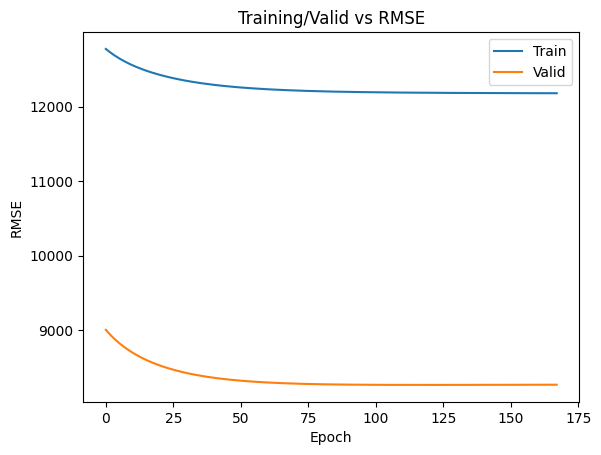

In [21]:
import matplotlib.pyplot as plt
import time
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script -- Sample code in tutorial! ##
theta, rmse_history_train, rmse_history_val = gradient_descent(X_train, X_valid, y_train, y_valid)
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
plt.plot(rmse_history_train, label='Train')
plt.plot(rmse_history_val, label='Valid')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('Training/Valid vs RMSE')
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

**Findings:** Since the learning rate here is fix , the value is too large for small batch sizes. Therefore, they overshoot, by means, they were not able to converge even after running numerous epoch. Beides, for the batch size that converges, we can see that as a smaller batch size converges within less time and less epoch.

In [22]:
from pandas._libs.tslibs.timestamps import Timestamp

def mini_batch(X_train, X_valid, y_train, y_valid, batch_size, ct, lr = 0.01):
  training_rmse = []
  valid_rmse = []
  times = []
  theta = np.zeros(X_train.shape[1]).reshape(-1, 1)
  l = int(X_train.shape[0]/batch_size)
  X_train = np.array(X_train)
  X_valid = np.array(X_valid)
  y_train = np.array(y_train)
  y_valid = np.array(y_valid)
  start = time.time()
  epoch = 0
  converge = False

  while True:
    #shuffle each epoch
    shuffle_index = np.random.permutation(X_train.shape[0])
    shuffle_X_train = X_train[shuffle_index]
    shuffle_y_train = y_train[shuffle_index]
    for i in range (0, l):
      mini_x_train = shuffle_X_train[i*batch_size:(i+1)*batch_size]

      mini_y_train = shuffle_y_train[i*batch_size:(i+1)*batch_size]
      mini_y_pred_train = mini_x_train @ theta
      gradients = (2 * mini_x_train.transpose() @ (mini_y_pred_train - mini_y_train)) / float(mini_x_train.shape[0])
      theta = theta - lr * gradients

    y_pred_train = X_train @ theta
    rmse_train = calculate_rmse(y_pred_train, y_train)
    training_rmse.append(rmse_train)
    y_pred_valid = X_valid @ theta
    rmse_valid = calculate_rmse(y_pred_valid, y_valid)
    valid_rmse.append(rmse_valid)

    if rmse_train>10**20:
      print('********************************')
      print('Batch size ' + str(batch_size) + ' broke at ' + str(epoch))
      print('Diverge')
      print('********************************')
      print()
      break
    times.append(time.time()-start)
    epoch = epoch + 1

    if float(rmse_train) <= ct:
      print('********************************')
      print('Batch size ' +  str(batch_size) + ' terminated at ' + str(epoch))
      print('Converge')
      print('********************************')
      converge = True

      plt.subplot(1, 2, 1)
      plt.plot(np.arange(1, epoch+1), training_rmse, label='train')
      plt.plot(np.arange(1, epoch+1), valid_rmse, label='valid')
      plt.xlabel('Epoch')
      plt.ylabel('RMSE')
      plt.title('Batch size: ' + str(batch_size) + '\nRMSE vs Epoch')
      plt.legend()

      plt.subplot(1, 2, 2)
      plt.plot(times, training_rmse, label='train')
      plt.plot(times, valid_rmse, label='valid')
      plt.xlabel('Time')
      plt.ylabel('RMSE')
      plt.title('Batch size: ' + str(batch_size) + '\nRMSE vs Time')
      plt.legend()
      plt.tight_layout()
      plt.show()
      break

  return theta, training_rmse, valid_rmse, times, converge

********************************
Batch size 1 broke at 0
Diverge
********************************

********************************
Batch size 2 broke at 1
Diverge
********************************

********************************
Batch size 4 broke at 6
Diverge
********************************

********************************
Batch size 8 broke at 8
Diverge
********************************

********************************
Batch size 16 broke at 9
Diverge
********************************

********************************
Batch size 32 broke at 10
Diverge
********************************

********************************
Batch size 64 broke at 12
Diverge
********************************

********************************
Batch size 128 broke at 15
Diverge
********************************

********************************
Batch size 256 broke at 24
Diverge
********************************

********************************
Batch size 512 broke at 42
Diverge
******************************

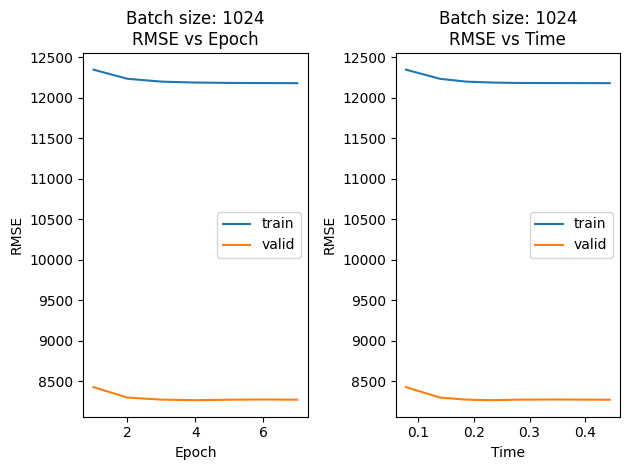

********************************
Batch size 2048 terminated at 12
Converge
********************************


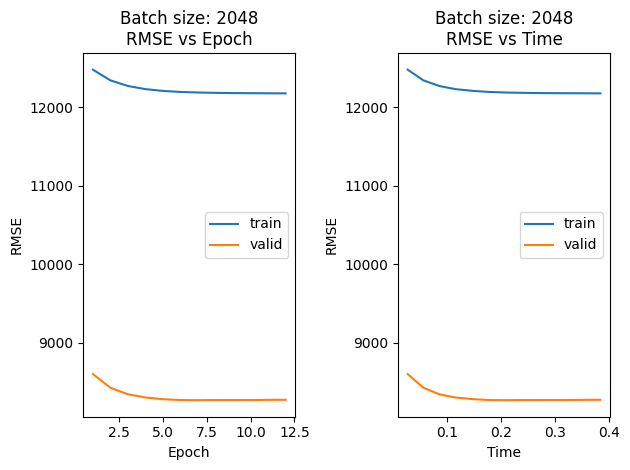

********************************
Batch size 4096 terminated at 25
Converge
********************************


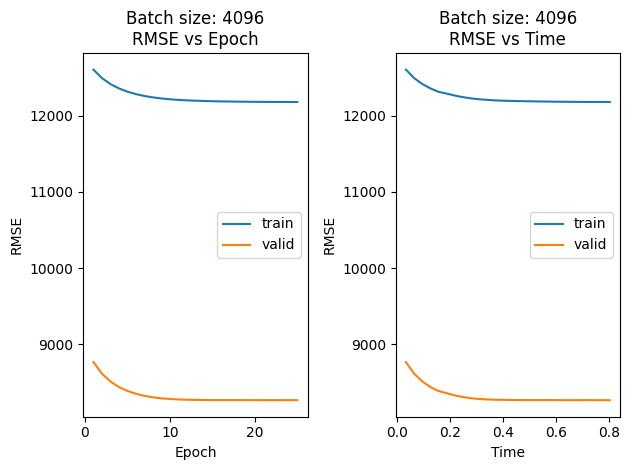

********************************
Batch size 8192 terminated at 56
Converge
********************************


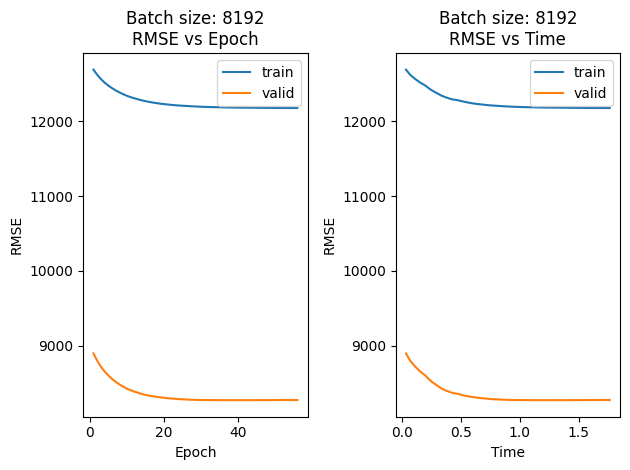

********************************
Batch size 16384 terminated at 172
Converge
********************************


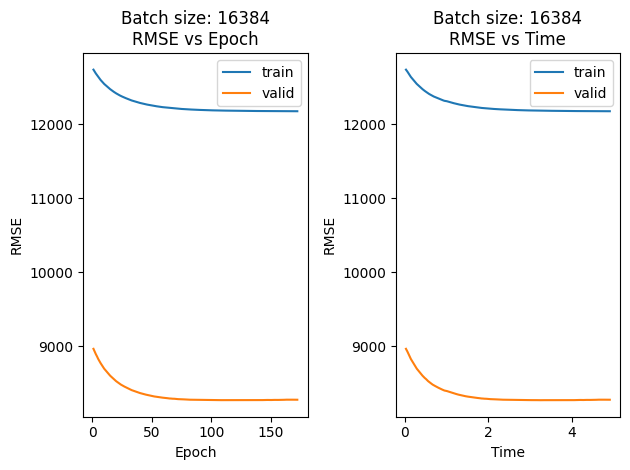

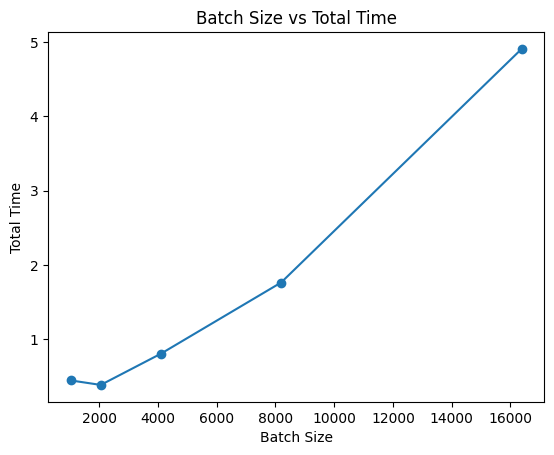

In [23]:
batch = []
total_time = []
for i in range (0, 15):
  theta, training_rmse, valid_rmse, times, converge =  mini_batch(X_train, X_valid, y_train, y_valid, 2**i, 1.001*rmse_ds, lr = 0.01)
  if converge == True:
    batch.append(2**i)
    total_time.append(times[-1])
plt.plot(batch, total_time, marker = 'o')
plt.title('Batch Size vs Total Time')
plt.xlabel('Batch Size')
plt.ylabel('Total Time')
plt.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

**Findings:** In practical, the result will differ each time we run since we are using the np.random.permutation function to shuffle the training dataset after running every epoch. The result in this notebook remain the same because random.seed(2) was used.
Here we picked batch size 512, 256, 128 which did not converge while the learning rate was 0.01. Therefore we started to try a smaller learning rate. For learning rate of 0.005, batch size 512 converged. Then, for learning rate 0.003, both batch size 256 and 512 converged. Later, for learning rate 0.001 all batch size 128, 256, 512 converged. As a result, we can see that a smaller batch size requires a smaller learning rate. Besides, to reach a desired rmse criteria. A smaller batch size is able to converge by runnung less epoch and spends less time.

| Batch Size \  Learning Rate  |0.005    |0.003    |0.002    |0.0001   |
|------------------------------|---------|---------|---------|---------|
| 512                          |Converged|Converged|Converged|Converged|
| 256                          |Diverged |Converged|Converged|Converged|
| 128                          |Diverged |Diverged |Diverged |Converged|


**Findings:** Based on part 4's fastest convergence time, batch size of 1024 is chosen. Then, we swept through learning rate [0.001, 0.002, 0.003, 0.004, 0.005. 0.006, 0.007, 0.008, 0.009. 0.01] these 10 values. As a result, all these learning rate values converged. Also, we can find that a smaller learning rate takes longer time for the model to converage. But again, in practical, the result will differ each time we run since we are using the *np.random.permutation* function to shuffle the training dataset after running every epoch. The result in this notebook remain the same because random.seed(2) was used.

********************************
Batch size 128 broke at 22
Diverge
********************************

********************************
Batch size 256 broke at 42
Diverge
********************************

********************************
Batch size 512 terminated at 6
Converge
********************************


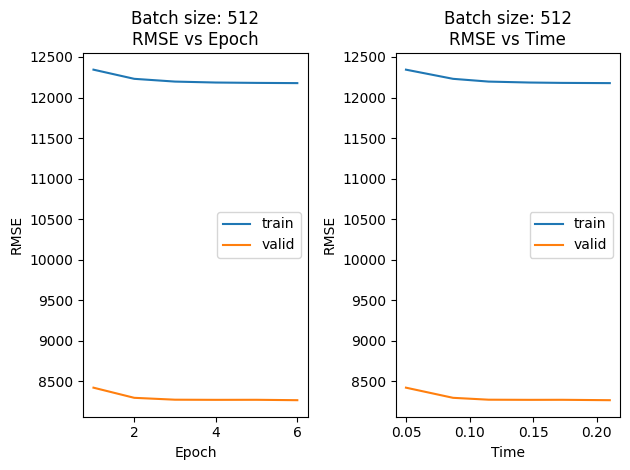

In [24]:
#Pick 3 batch sizes that do not converge with a learning rate of  𝛼=0.01 and try to find a learning rate that results in convergence for each batch size.
#Try learning rate 0.005
for i in range (7, 10):
  mini_batch(X_train, X_valid, y_train, y_valid, 2**i, 1.001*rmse_ds, lr = 0.005)

********************************
Batch size 128 broke at 34
Diverge
********************************

********************************
Batch size 256 terminated at 6
Converge
********************************


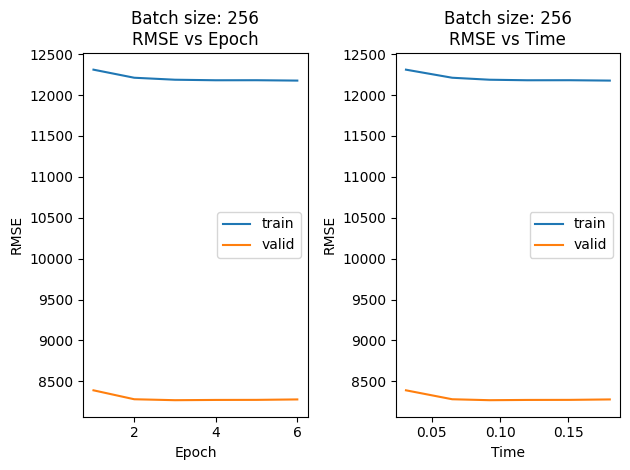

********************************
Batch size 512 terminated at 10
Converge
********************************


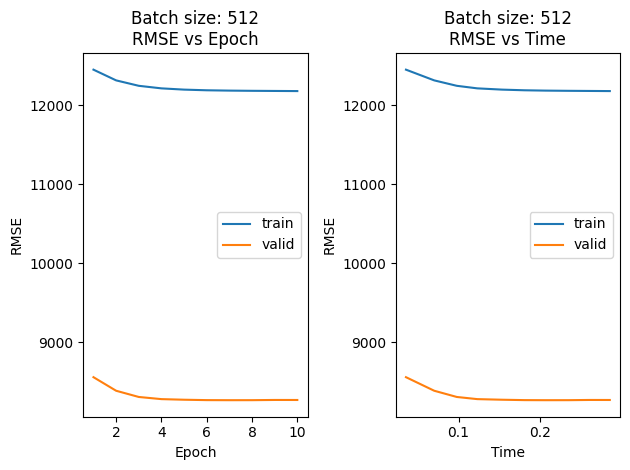

In [25]:
#Try learning rate 0.003
for i in range (7, 10):
  mini_batch(X_train, X_valid, y_train, y_valid, 2**i, 1.001*rmse_ds, lr = 0.003)

********************************
Batch size 128 broke at 61
Diverge
********************************

********************************
Batch size 256 terminated at 7
Converge
********************************


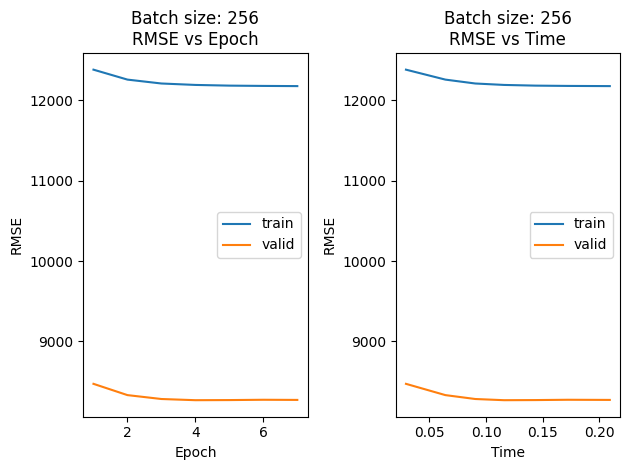

********************************
Batch size 512 terminated at 14
Converge
********************************


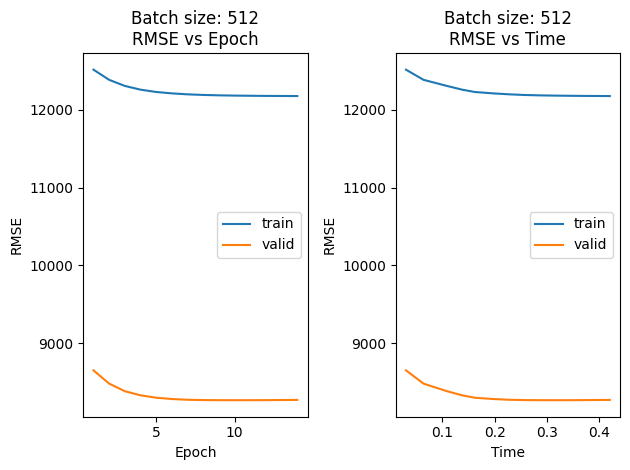

In [26]:
#Try learning rate 0.002
for i in range (7, 10):
  mini_batch(X_train, X_valid, y_train, y_valid, 2**i, 1.001*rmse_ds, lr = 0.002)

********************************
Batch size 128 terminated at 8
Converge
********************************


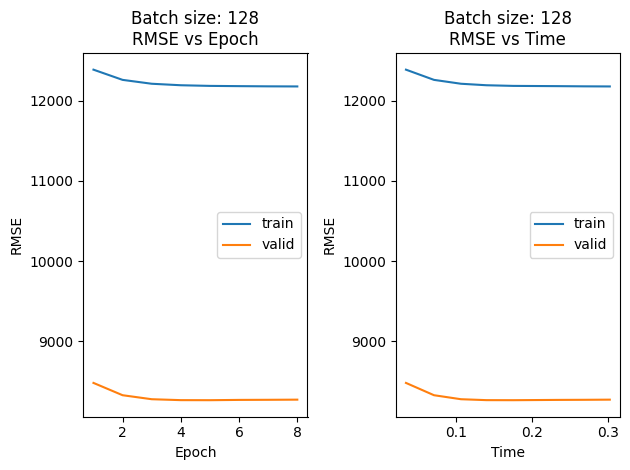

********************************
Batch size 256 terminated at 14
Converge
********************************


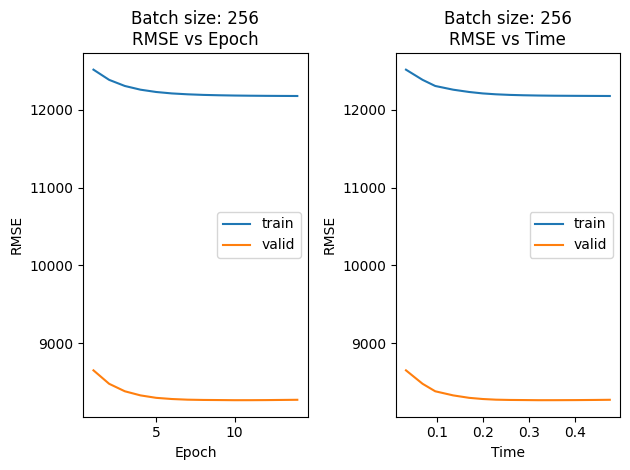

********************************
Batch size 512 terminated at 28
Converge
********************************


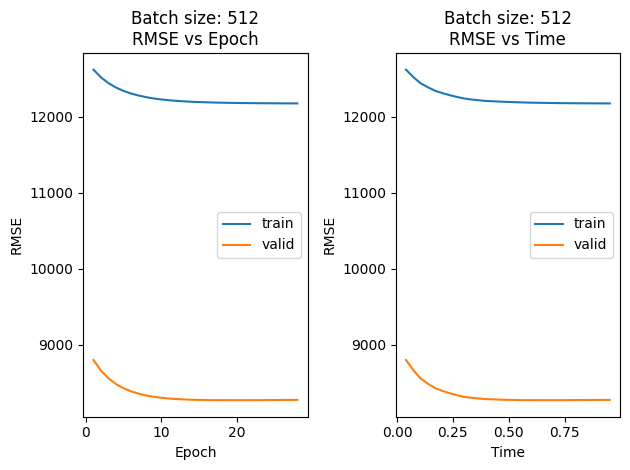

In [27]:
#Try learning rate 0.001
for i in range (7, 10):
  mini_batch(X_train, X_valid, y_train, y_valid, 2**i, 1.001*rmse_ds, lr = 0.001)

--------- Learning rate: 0.001 ---------
********************************
Batch size 1024 terminated at 56
Converge
********************************


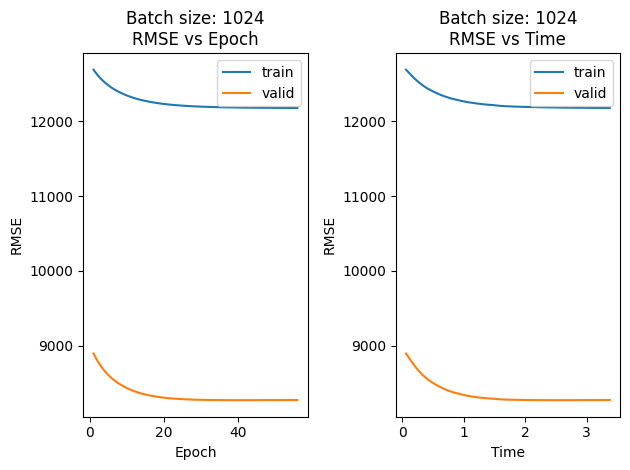

--------- Learning rate: 0.002 ---------
********************************
Batch size 1024 terminated at 29
Converge
********************************


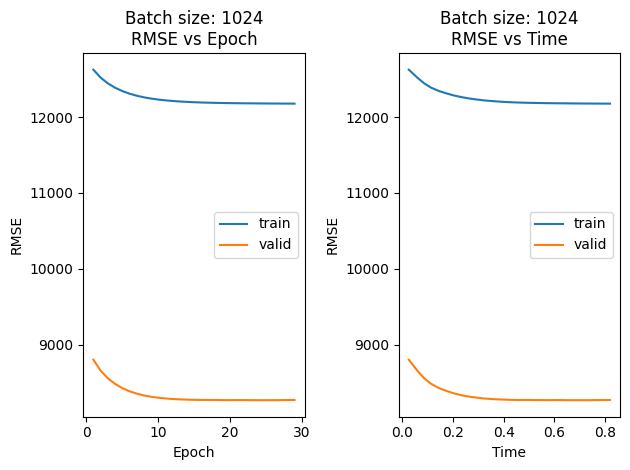

--------- Learning rate: 0.003 ---------
********************************
Batch size 1024 terminated at 19
Converge
********************************


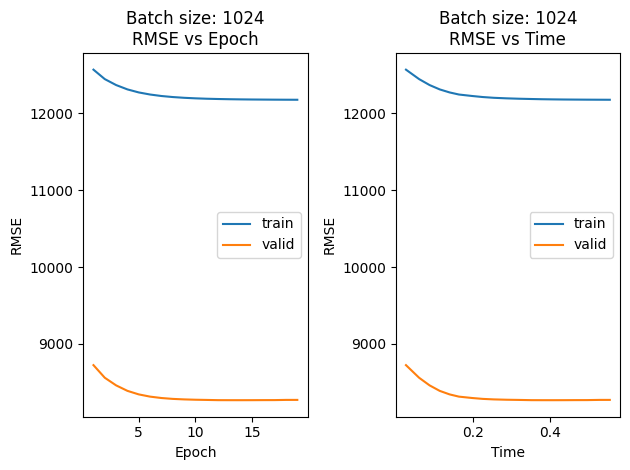

--------- Learning rate: 0.004 ---------
********************************
Batch size 1024 terminated at 15
Converge
********************************


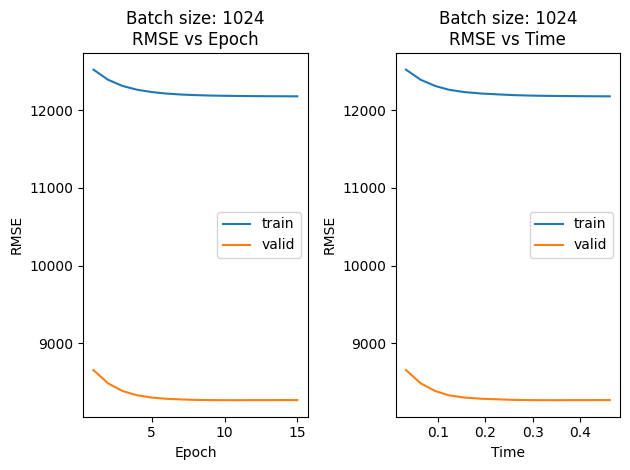

--------- Learning rate: 0.005 ---------
********************************
Batch size 1024 terminated at 12
Converge
********************************


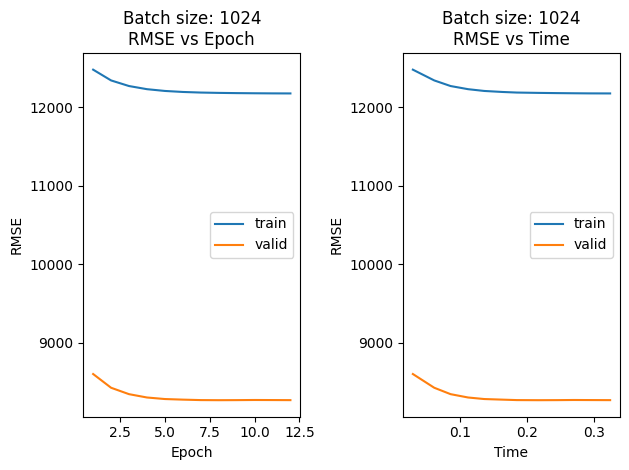

--------- Learning rate: 0.006 ---------
********************************
Batch size 1024 terminated at 10
Converge
********************************


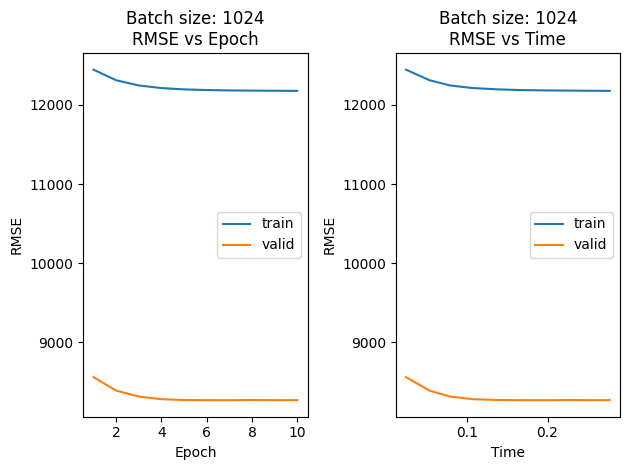

--------- Learning rate: 0.007 ---------
********************************
Batch size 1024 terminated at 9
Converge
********************************


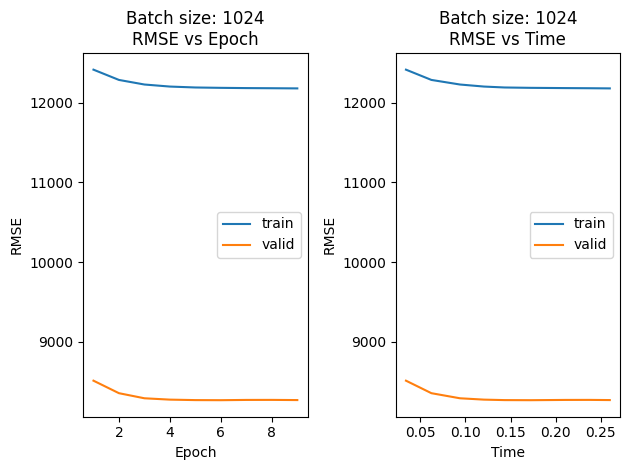

--------- Learning rate: 0.008 ---------
********************************
Batch size 1024 terminated at 8
Converge
********************************


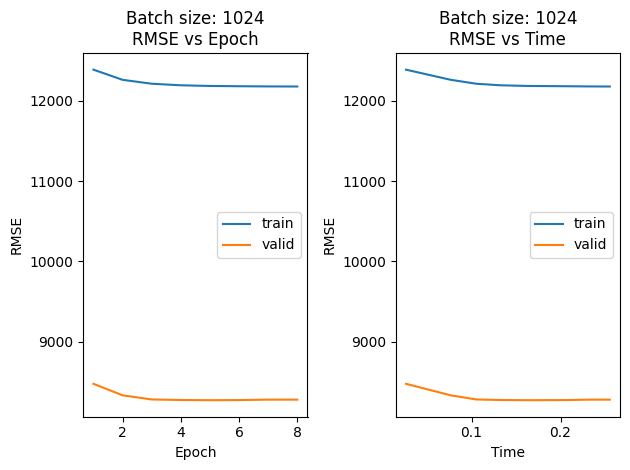

--------- Learning rate: 0.009 ---------
********************************
Batch size 1024 terminated at 7
Converge
********************************


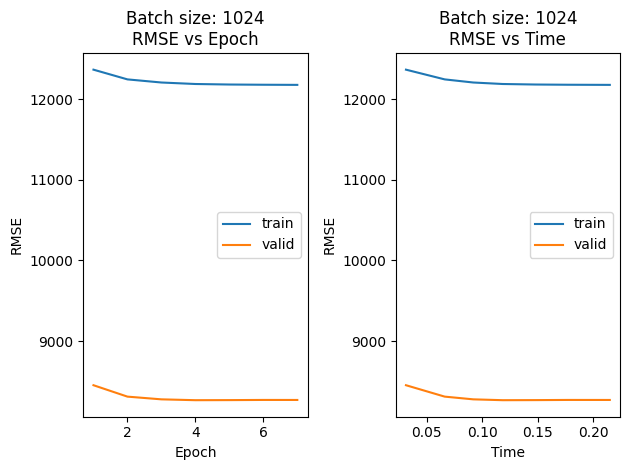

--------- Learning rate: 0.01 ---------
********************************
Batch size 1024 terminated at 6
Converge
********************************


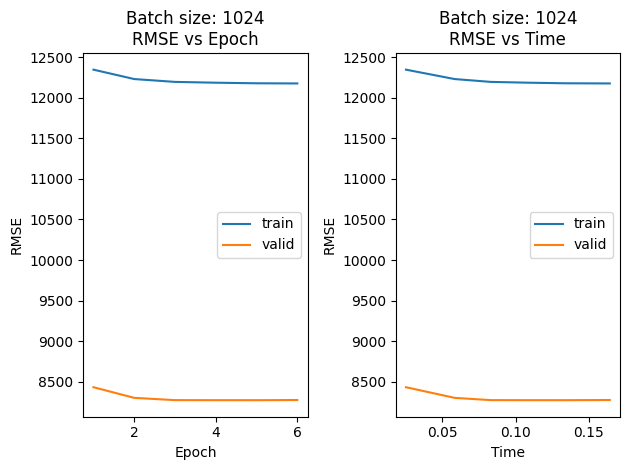

In [28]:
#Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate
lr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007,0.008, 0.009, 0.01]
for l in lr:
  print('--------- Learning rate: ' + str(l) + ' ---------')
  mini_batch(X_train, X_valid, y_train, y_valid, 2**10, 1.001*rmse_ds, lr = l)